## Callable Bonds
The callable bonds are the zero-coupon bonds embedded call option (European).
Generally, we can say that,

$$ P_{\textrm{callable bond}} = P_{\textrm{ZCB}} − P_{\textrm{embedded option}}$$

Next, we will price the option-free zero-coupon bonds and callable bonds separately.

## Pricing using CIR Model

We use the implicit method to solve this PDEs problem. We discretize the interest rate $r$ into $N$ equally spaced units of $\delta r$, and the time variable $t$ into $M$ equally spaced units of $\delta t$,

$$r_j = j\delta r, j = 0,\ldots, N;$$

$$t_i = i\delta t, i = 0,\ldots, M.$$

### Pricing zero-coupon bonds

In this part, we price the zero-coupon bonds based on the CIR model.
When $j = N$, $r_j = r_{max}$. Please note that we are using the engineering’s time. It means that $t_i = T$ when $i = 0$.
Letting $a = K\Theta$ and $K = b$, the pricing problem of zero-coupon bond can be expressed as,

$$-\frac{\partial B(r(t), t)}{\partial t} + \frac{1}{2} r(t) \sigma^2 \frac{\partial^2 B(r(t), t)}{\partial r^2} + (a − br(t))\frac{\partial B(r(t), t)}{\partial r} − r(t)B(r(t), t) = 0$$

The boundary conditions can be expressed

$$\begin{align}
&B(r_{max}, t) = 0, t > 0; \\ \\
&\frac{\partial B(0, t)}{\partial t} + a \frac {\partial B(0, t)}{\partial r} = 0, t > 0\;\textrm{and}\;a > 0; \\\\
&B(r, 0) = 1, 0 < r < r_{max}.
\end{align}$$

Notice, we do not know the bond value at $r = 0$ and use the implicit Euler scheme for the Black-Scholes equation as ($B^i_j = B(r_j, t_i))$,

$$−\frac{B^{i+1}_{j} − B^i_j}{\delta t} + \frac{1}{2}\sigma^2 r^{i+1}_j\frac{B^{i+1}_{j−1} − 2B^{i+1}_j + B^{i+1}_{j+1}}{\delta r^2} + (a − b r^{i+1}_j)\frac{B^{i+1}_{j+1} − B^{i+1}_{j−1}}{2\delta r} − r^{i+1}_j B^{i+1}_j = 0, 1 ≤ j ≤ N − 1$$

Easily, we have,

$$B^i_j = \hat{a}_j B^{i+1}_{j−1} + \hat{b}_j B^{i+1}_j + \hat{c}_j B^{i+1}_{j+1}, \textrm{with}\; j = 1,\ldots, N − 1 \;\textrm{and}\;i = 1,\ldots, M$$
where
$$\begin{align}
&\hat{a}_j = \frac{1}{2}a\frac{\delta t}{\delta r} − b \delta t \frac{1}{2}
(j − 1) − \sigma^2 \frac{\delta t}{\delta r} (j − 1);\\
&\hat{b}_j = 1 + \delta r(j − 1) \delta t + \sigma^2\frac{\delta t}{\delta r} (j − 1); \\
&\hat{c}_j = b\delta t\frac{1}{2}(j − 1) − a \delta t\frac{1}{2\delta r} − \sigma^2\delta t \frac{1}{2\delta r} (j − 1).
\end{align}
$$

For boundary conditions, we have,

$$\begin{align}
&−\frac{B^{i+1}_j − B^i_j}{\delta t} + a\frac{B^{i+1}_{j+1} − B^{i+1}_{j}}{\delta r} = 0, \;\textrm{when}\; j = 0\; (r = 0) \\
&B^i_N = 0, \;\textrm{when}\; j = N\; (r = r_{max}) \\
&B^0_j = 1, \;\textrm{when}\; t = 0. 
\end{align}$$

We suppose that the parameters in CIR model as $a = bδ$, $b = 0.54958$ and $δ = 0.38757$. 

In [1]:
import numpy as np

def finite_difference_cir(T):
  bondprice = 1
  dr = 0.01
  dt = 0.01
  rmax = 3.5
  a = 0.54958 * 0.034847
  b = 0.54958
  delta = 0.38757

  M = int(T//dt)
  N = int(rmax//dr)

  f = np.zeros(shape=(N, M))
  f[:, 0] = bondprice
  f[-1, :] = 0

  aa = np.zeros(N)
  bb =  np.zeros(N)
  cc = np.zeros(N)

  j = np.arange(1, N)
  aa[1:] = 0.5 * a * dt/dr - b * dt * 0.5 * (j-1) - delta**2 * 0.5 * dt/dr * (j-1)
  bb[1:] = dr * (j-1) * dt + 1 + delta**2 * dt/dr * (j-1)
  cc[1:] = b * dt * 0.5 * (j-1) - a * dt * 0.5/dr - delta**2 * dt * 0.5/dr * (j-1)

  A = np.diag(aa[1:], -1) + np.diag(bb) + np.diag(cc[:-1], 1)

  A[0, 0] = 1 + a * dt/dr
  A[0, 1] = -a * dt/dr

  A = np.linalg.inv(A)

  #for i in range(M-1):
  f[:, 1:M] = np.sum((A*f[:, :M-1]))

  return N, f

In [2]:
N, f5 = finite_difference_cir(5)
N, f7 = finite_difference_cir(7)
N, f10 = finite_difference_cir(10)
N, f20 = finite_difference_cir(20)

ValueError: ignored

In [ ]:
print (f5)

[[1.         0.97099285 0.         ... 0.         0.         0.        ]
 [1.         1.08728956 0.         ... 0.         0.         0.        ]
 [1.         1.00609746 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.35506001 0.         ... 0.         0.         0.        ]
 [1.         0.2449336  0.         ... 0.         0.         0.        ]
 [0.         0.11540023 0.         ... 0.         0.         0.        ]]


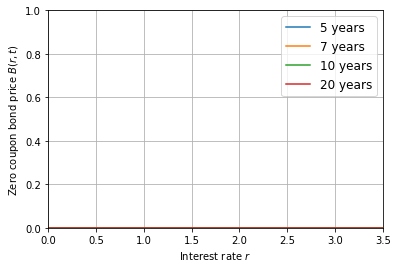

In [ ]:
import matplotlib.pyplot as plt

def func(v, x, f, X=1):
  return X*np.interp(v, x, f[:, -1])

xplot = np.linspace(0, 3.5, N)

plt.plot(xplot, func(xplot, xplot, f5), label='5 years')
plt.plot(xplot, func(xplot, xplot, f7), label='7 years')
plt.plot(xplot, func(xplot, xplot, f10), label='10 years')
plt.plot(xplot, func(xplot, xplot, f20), label='20 years')

plt.ylim(0, 1)
plt.xlim(0, 3.5)
plt.xlabel("Interest rate $r$")
plt.ylabel("Zero coupon bond price $B(r, t)$")
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

Fig.\ref{fig:zbond_cir} depicts the value of 5 years zero-coupon bond with face value 1. We suppose that the parameters in CIR model as $a = b\delta$, $b = 0.54958$ and $\delta = 0.38757$. It shows the interest rate changes from 0 to 350% and the bond price decrease from face value to 0. As expected the bond price decrease when the time of maturity increase.

### Pricing bonds with European call options

The bonds with European call options just have a single possible call date. We denote the call date by $\tau_c$ and define the engineering time $t_c = T − \tau_c$. Meanwhile, we denote the notice time as $\tau_n$ and the engineering time as $t_n = T − \tau_n$. Also, we denote the call price with $X$.

In general, we assume that it is optimal for the issuer to minimize the value of the contract. It means the issuer will exercise the options if the price of the callable bonds exceed the exercise price at the notice date. Otherwise, the issuer will give up the right of the call options and the callable bonds price are equal to the price of non-option bonds.

The interest rate $r_b$ represents the “break-even” rate: the $r$ value at which the issuer is indifferent between exercising the options or not doing so at the notice date $\tau_n$. 

The “break-even” interest rate can be determined by solving

$$X\cdot B(r_b, t_n − t_c) − P(r_b, t_n ) = 0$$

where $B(r_b, t_n−t_c)$ is the value at time $t_n$ of a zero-coupon bond maturing at $t_c$ and $P(r_b, t_n) denote the price of the callable bonds just before the notice date.

The solution of equation (49) is the cross point between the two curves and 
the callable bond price, at the notice date, is then made of two contributions 
$$
P(r_b, t_n) =
\begin{cases}
XB(r, t_n − t_c)\; \textrm{if}\; r \le r_b \\
P(r_b, t_n)\; \textrm{if}\; r \ge r_b \\
\end{cases}$$

In [ ]:
X = 0.7
N, f5 = finite_difference(2)
N, fc = finite_difference(0.167)

In [ ]:
from scipy.optimize import brentq

def func(v, x, f, X=1):
  return X*np.interp(v, x, f[:, -1])

def myfunc(v, x, f5, fc, X):
  return func(v, x, f5) - func(v, x, fc, X)

x = np.linspace(0, 3.5, N)
rb = brentq(myfunc, 0, 1, args=(x, f5, fc, X))
print (rb)

0.3441346749061088


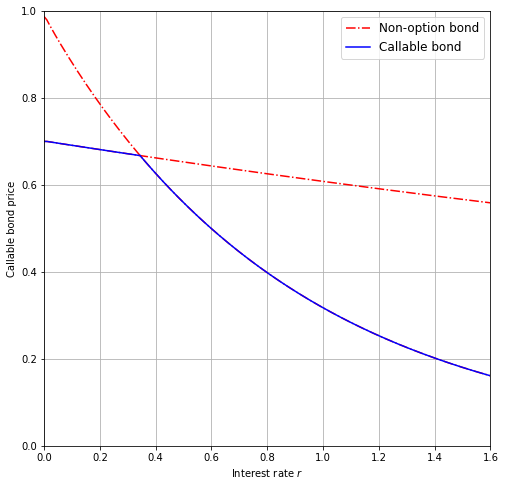

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

xplot = np.linspace(0, 3.5, N)
xplot_l = np.linspace(0, rb, N)
xplot_r = np.linspace(rb, 3.5, N)

plt.plot(xplot, func(xplot, xplot, f5), label='Non-option bond', linestyle='-.', color='red')
plt.plot(xplot, func(xplot, xplot, fc, X), linestyle='-.', color='red')
plt.plot(xplot_r, func(xplot_r, xplot, f5), label='Callable bond', color='blue')
plt.plot(xplot_l, func(xplot_l, xplot, fc, X), color='blue')

plt.ylim(0, 1)
plt.xlim(0, 1.6)
plt.xlabel("Interest rate $r$")
plt.ylabel("Callable bond price")
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

Fig. 4 illustrates the value of a zero-coupon callable bonds at the notice date 2 years before the maturity. We derived that the “break-even” interest rate is $r_b = 0.344$. The call price is 0.7 and the time between the call date and the notice date is 2 month, i.e. $t_n−t_c = 0.167$.

## Pricing using Vasicek Model 

Based on the Vasicek interest rate model and the assumption we mentioned before, the pricing problem of zero-coupon bond can be expressed as

$$−\frac{\partial B(r(t), t)}{\partial t} + \frac{1}{2}\sigma^2 \frac{\partial^2 B(r(t), t)}{\partial r^2} + (a − br(t)) \frac{\partial B(r(t), t)}{\partial r}
− r(t)B(r(t), t) = 0$$
where $a = K\theta$ and $b = K$. One of the disadvantages of the Vasicek model is that the interest rate may be negative in this model. Based on the practical experience, we know that the equation (51) holds the following boundary conditions when $r(t)$ is not negative.

When $r(t) = 0$, (51) can be transform to,

$$−\frac{\partial B(0, t)}{\partial t} + \frac{1}{2}\sigma^2 \frac{\partial^2 B(0, t)}{\partial r^2} + a\frac{\partial B(0, t)}{\partial r}
− r(t)B(r(t), t) = 0$$

When $r(t) = r_{max}$ and $t = 0$, we get,

$$
\begin{align}
&B(r_{max}, t) = 0,\; t > 0;\\
&B(r, 0) = 1,\; 0 \lt r \lt r_{max}.
\end{align}$$

Using the implicit Euler scheme for the Black-Scholes equation, where $B^i_j = B(r_j , t_i)$, we derive that

$$-\frac{B^{i+1}_j − B^i_j}{\delta t} + \frac{1}{2}\sigma^2 \frac{B^{i+1}_{j−1} − 2B^{i+1}_j + B^{i+1}_{j+1}}{\delta r^2} + (a − br^{i+1}_j) \frac{B^{i+1}_{j+1} − B^{i+1}_{j−1}}{2\delta r} − r_j B^{i+1}_j = 0,\;1 \le j \le N − 1.$$

Easily, we have,

$$B^i_j = \hat{a}_j B^{i+1}_{j−1} + \hat{b}_j B^{i+1}_j + \hat{c}_j B^{i+1}_{j+1}, \textrm{with}\; j = 1,\ldots, N − 1 \;\textrm{and}\;i = 1,\ldots, M$$
where
$$\begin{align}
&\hat{a}_j = \frac{1}{2}a\frac{\delta t}{\delta r} − \frac{1}{2}b \delta t
(j − 1) − \frac{1}{2}\sigma^2 \frac{\delta t}{\delta r^2};\\
&\hat{b}_j = 1 + \delta r(j − 1) \delta t + \sigma^2\frac{\delta t}{\delta r^2}; \\
&\hat{c}_j = \frac{1}{2}b\delta t(j − 1) − a \delta t\frac{1}{2\delta r} − \sigma^2\delta t \frac{1}{2\delta r^2}.
\end{align}
$$

For boundary conditions, we have,

$$\begin{align}
&−\frac{B^{i+1}_j − B^i_j}{\delta t} + \frac{1}{2}\sigma^2\frac{B^{i+1}_{j-1}-2B^{i+1}_j+B^{i+1}_{j+1}}{\delta r^2} + a\frac{B^{i+1}_{j+1} − B^{i+1}_{j}}{\delta r} = 0, \;\textrm{when}\; j = 0\; (r = 0) \\
&B^i_N = 0, \;\textrm{when}\; j = N\; (r = r_{max}) \\
&B^0_j = 1, \;\textrm{when}\; t = 0. 
\end{align}$$

Fig. 5 depicts the value of 5, 7, 10 and 20 years zero-coupon bonds with face value 1, based on the Vasicek model. We suppose that the parameters as $a = 0.0038$, $b = 0.025$ and $\delta = 0.0126$. It shows the interest rate changes from 0 to 100% and the bond price
decrease from face value to 0. The bond value based on the Vasicek model decrease
more quickly than the value in Fig. 1. Comparing to our practical knowledge, we can say that the CIR model fit the practical situation much better.

In [ ]:
import numpy as np

def finite_difference_vasicek(T):
  bondprice = 1
  dr = 0.01
  dt = 0.01
  rmax = 3.5
  a = 0.0038
  b = 0.0025
  delta = 0.0126

  M = int(T//dt)
  N = int(rmax//dr)

  f = np.zeros(shape=(N, M))
  for j in range(N):
    f[j, 0] = bondprice

  for i in range(M):
    f[-1, i] = 0

  # Calculate aa , bb , cc (parameters) for Model
  aa = np.zeros(N)
  bb =  np.zeros(N)
  cc = np.zeros(N)

  for j in range(1, N):
    aa[j] = 0.5 * a * dt/dr - 0.5 * b * dt * (j-1) - 0.5 * delta**2 * dt/dr**2
    bb[j] = 1 + dr * (j-1) * dt + delta**2 * dt/dr**2
    cc[j] = 0.5 * b * dt * (j-1) - a * dt * 0.5/dr - delta**2 * dt * 0.5/dr**2

  A = np.diag(aa[1:], -1) + np.diag(bb) + np.diag(cc[:-1], 1)

  # Calculations(Solve System Ax=d)
  A[0, 0] = 1 + a * dt/dr
  A[0, 1] = -a * dt/dr

  A[0, 0] = 1 - 1/2 * delta**2 * dt/dr**2 + a * dt/dr  
  A[0, 1] = delta**2 * dt/dr**2 - a * dt/dr
  A[0, 2] = -1/2 * delta**2 * dt/dr**2

  A = np.linalg.inv(A)

  # Solve System
  for i in range(M-1):
    f[:, i+1] = np.dot(A, f[:, i])

  return N, f

In [ ]:
N, f5 = finite_difference_vasicek(5)
N, f7 = finite_difference_vasicek(7)
N, f10 = finite_difference_vasicek(10)
N, f20 = finite_difference_vasicek(20)

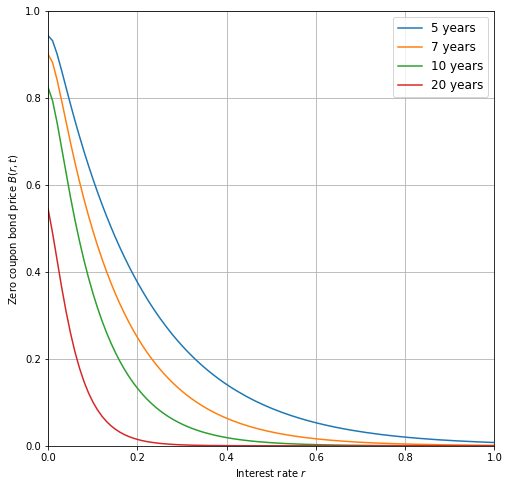

In [ ]:
from scipy.optimize import brentq

def func(v, x, f, X=1):
  return X*np.interp(v, x, f[:, -1])

xplot = np.linspace(0, 3.5, N)

plt.plot(xplot, func(xplot, xplot, f5), label='5 years')
plt.plot(xplot, func(xplot, xplot, f7), label='7 years')
plt.plot(xplot, func(xplot, xplot, f10), label='10 years')
plt.plot(xplot, func(xplot, xplot, f20), label='20 years')

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Interest rate $r$")
plt.ylabel("Zero coupon bond price $B(r, t)$")
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

### Pricing bonds with European call options

We are pricing the zero-coupon bonds with European call options by the same method which we mentioned above. We suppose that the Vasicek parameters $a = 0.0038$, $b = 0.0025$ and $\delta = 0.0126$.
Fig. 6 shows the value of zero-coupon callable bonds at notice date 2 years before the maturity as Fig. 3. We suppose the strike price of the embeded call option is 0.7, the time between the call date and the notice date is $t_n − t_c$ = 0.167 year (i.e. 2 months) and the face value of the callable bond is 1. 
The “break-even” interest rate in this situation is $r_b = 0.20$ which is below the $r_b$ in Fig. 3. 

Comparing to Fig. 3, the value of the bonds decrease more quickly and the price on the notice date is a little bit higher based on the Vasicek interest
rate model.
The reason of the difference between the Vasicek and CIR models is that the Vasicek interest rate may actually become negative unlike CIR. Under Vasicek model, the interest rate is normally distributed and so there is a probability for them being negative. For the CIR model this density function has the property of a $\Gamma$ distribution, not allowing for negative interest rates. It means the random term becomes increasingly smaller as
the rate approaches zero in CIR.

In [ ]:
X = 0.7
N, f5 = finite_difference_vasicek(2)
N, fc = finite_difference_vasicek(0.167)

In [ ]:
from scipy.optimize import brentq

def func(v, x, f, X=1):
  return X*np.interp(v, x, f[:, -1])

def myfunc(v, x, f5, fc, X):
  return func(v, x, f5) - func(v, x, fc, X)

x = np.linspace(0, 3.5, N)
rb = brentq(myfunc, 0, 1, args=(x, f5, fc, X))
print (rb)

0.2028408231518745


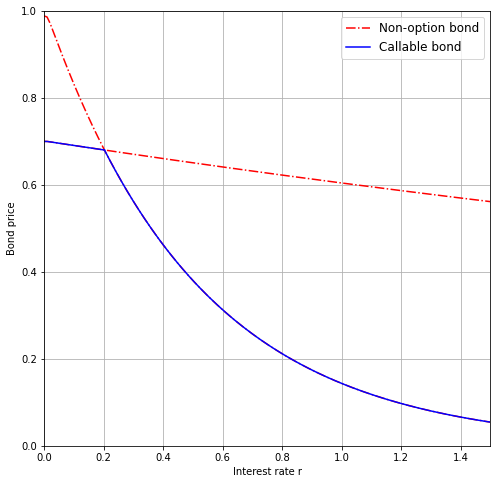

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

xplot = np.linspace(0, 3.5, N)
xplot_l = np.linspace(0, rb, N)
xplot_r = np.linspace(rb, 3.5, N)

plt.plot(xplot, func(xplot, xplot, f5), label='Non-option bond', linestyle='-.', color='red')
plt.plot(xplot, func(xplot, xplot, fc, X), linestyle='-.', color='red')
plt.plot(xplot_r, func(xplot_r, xplot, f5), label='Callable bond', color='blue')
plt.plot(xplot_l, func(xplot_l, xplot, fc, X), color='blue')

plt.ylim(0, 1)
plt.xlim(0, 1.5)
plt.xlabel("Interest rate r")
plt.ylabel("Bond price")
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [ ]:
import numpy as np

def exact_zcb(theta, kappa, sigma, tau, r0=0.):
  B = (1 - np.exp(-kappa*tau)) / kappa
  A = np.exp((theta-(sigma**2)/(2*(kappa**2))) * (B-tau) - (sigma**2)/(4*kappa)*(B**2)) 
  return A * np.exp(-r0*B)

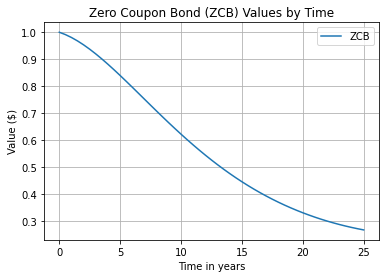

In [ ]:
import matplotlib.pyplot as plt

Ts = np.arange(0.0, 25.5, 0.5)

zcbs = [exact_zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

plt.title("Zero Coupon Bond (ZCB) Values by Time")
plt.plot(Ts, zcbs, label='ZCB')
plt.ylabel("Value ($)")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import math

def exercise_value(K, R, t):
  return K*math.exp(-R*t)

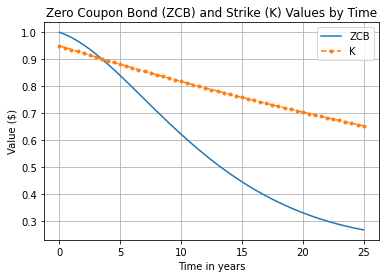

In [ ]:
Ts = np.arange(0.0, 25.5, 0.5)

Ks = [exercise_value(0.95, 0.015, t) for t in Ts]
zcbs = [exact_zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

plt.title("Zero Coupon Bond (ZCB) and Strike (K) Values by Time")
plt.plot(Ts, zcbs, label='ZCB')
plt.plot(Ts, Ks, label='K', linestyle="--", marker=".")
plt.ylabel("Value ($)")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)
plt.show()